In [ ]:
# Sumaišties matrica naudojant tik MLP ir kryžminę validaciją

import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

df = pd.read_csv('cdc_diabetes_data.csv', encoding='utf-8-sig')

df.drop(columns=['ID'], inplace=True)

X = df.drop(columns=['Diabeto indikatorius'])
y = df['Diabeto indikatorius']

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=7))
])

f1_scores = []
confusion_matrices = []

for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    pipeline.fit(X_train, y_train)
    test_preds = pipeline.predict(X_test)

    f1_scores.append(f1_score(y_test, test_preds))
    cm = confusion_matrix(y_test, test_preds)
    confusion_matrices.append(cm)

print(f"Mean F1-score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")

mean_cm = np.mean(confusion_matrices, axis=0)
cm_percentage = mean_cm.astype('float') / mean_cm.sum(axis=1)[:, np.newaxis] * 100


fig, ax = plt.subplots()
cax = ax.matshow(cm_percentage, cmap=plt.cm.Blues, vmin=0, vmax=100)  
plt.title('Nenaudoti metodai (%)', fontsize=13.5)
fig.colorbar(cax)

ax.set_xticks(np.arange(2))  
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Ne diabetas', 'Diabetas'], fontsize=10)
ax.set_yticklabels(['Ne diabetas', 'Diabetas'], fontsize=10)
ax.xaxis.set_ticks_position('bottom')

for (i, j), val in np.ndenumerate(cm_percentage):
    text_color = 'white' if val > 50 else 'black'
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center', color=text_color, fontsize=10)

plt.xlabel("Numatyta klasė", fontsize=13)
plt.ylabel("Tikroji klasė", fontsize=13)
plt.tight_layout()
#plt.savefig("diabetes_unmodified_cross_confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

Mean F1-score: 0.3243 ± 0.0369


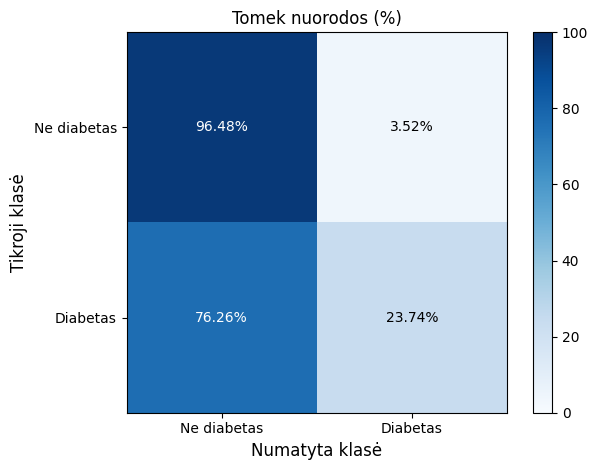

In [3]:
# Sumaišties matrica naudojant Tomek nuorodas ir kryžminę validaciją
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import TomekLinks
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

df = pd.read_csv('cdc_diabetes_data.csv', encoding='utf-8-sig')

df.drop(columns=['ID'], inplace=True)

X = df.drop(columns=['Diabeto indikatorius'])
y = df['Diabeto indikatorius']

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

pipeline = Pipeline([
    ('tomek', TomekLinks()),
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=7))
])

f1_scores = []
confusion_matrices = []

for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    pipeline.fit(X_train, y_train)
    test_preds = pipeline.predict(X_test)

    f1_scores.append(f1_score(y_test, test_preds))
    cm = confusion_matrix(y_test, test_preds)
    confusion_matrices.append(cm)

print(f"Mean F1-score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")

mean_cm = np.mean(confusion_matrices, axis=0)
cm_percentage = mean_cm.astype('float') / mean_cm.sum(axis=1)[:, np.newaxis] * 100
fig, ax = plt.subplots()
cax = ax.matshow(cm_percentage, cmap=plt.cm.Blues, vmin=0, vmax=100) 
plt.title('Tomek nuorodos (%)', fontsize=12)
fig.colorbar(cax)

ax.set_xticks(np.arange(2))  
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Ne diabetas', 'Diabetas'], fontsize=10)
ax.set_yticklabels(['Ne diabetas', 'Diabetas'], fontsize=10)
ax.xaxis.set_ticks_position('bottom')

for (i, j), val in np.ndenumerate(cm_percentage):
    text_color = 'white' if val > 50 else 'black'
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center', color=text_color, fontsize=10)

plt.xlabel("Numatyta klasė", fontsize=12)
plt.ylabel("Tikroji klasė", fontsize=12)
plt.tight_layout()
#plt.savefig("diabetes_tomek_cross_confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()


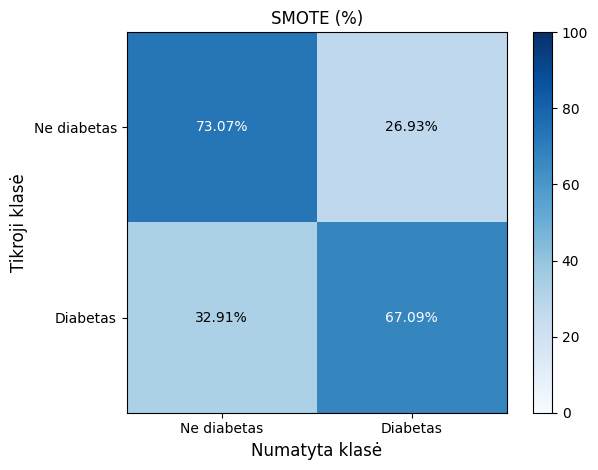

In [1]:
# Sumaišties matricos rezultatai, naudojant SMOTE ir kryžminę validaciją

import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

df = pd.read_csv('cdc_diabetes_data.csv', encoding='utf-8-sig')

df.drop(columns=['ID'], inplace=True)

X = df.drop(columns=['Diabeto indikatorius'])
y = df['Diabeto indikatorius']

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

pipeline = Pipeline([
    ('smote', SMOTE(sampling_strategy=0.99, random_state=7)),
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=7))
])

f1_scores = []
confusion_matrices = []

for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    pipeline.fit(X_train, y_train)
    test_preds = pipeline.predict(X_test)

    f1_scores.append(f1_score(y_test, test_preds))
    cm = confusion_matrix(y_test, test_preds)
    confusion_matrices.append(cm)

mean_cm = np.mean(confusion_matrices, axis=0)
cm_percentage = mean_cm.astype('float') / mean_cm.sum(axis=1)[:, np.newaxis] * 100
fig, ax = plt.subplots()
cax = ax.matshow(cm_percentage, cmap=plt.cm.Blues, vmin=0, vmax=100)  
plt.title('SMOTE (%)', fontsize=12)
fig.colorbar(cax)

ax.set_xticks(np.arange(2))  
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Ne diabetas', 'Diabetas'], fontsize=10)
ax.set_yticklabels(['Ne diabetas', 'Diabetas'], fontsize=10)
ax.xaxis.set_ticks_position('bottom')

for (i, j), val in np.ndenumerate(cm_percentage):
    text_color = 'white' if val > 50 else 'black'
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center', color=text_color, fontsize=10)

plt.xlabel("Numatyta klasė", fontsize=12)
plt.ylabel("Tikroji klasė", fontsize=12)
plt.tight_layout()
#plt.savefig("diabetes_smote_smote_cross_confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()


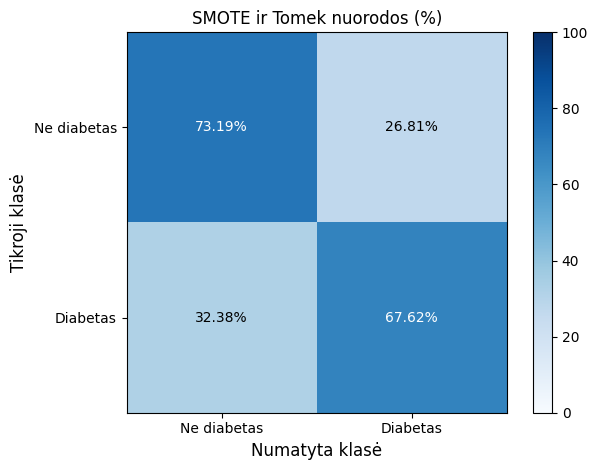

In [2]:
# Sumaišties matricos rezultatai, naudojant SMOTE ir Tomek nuorodas ir kryžminę validaciją
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

df = pd.read_csv('cdc_diabetes_data.csv', encoding='utf-8-sig')

df.drop(columns=['ID'], inplace=True)

X = df.drop(columns=['Diabeto indikatorius'])
y = df['Diabeto indikatorius']

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

pipeline = Pipeline([
    ('smotetomek', SMOTETomek(sampling_strategy=0.99, random_state=7)),
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=7))
])

f1_scores = []
confusion_matrices = []

for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    pipeline.fit(X_train, y_train)
    test_preds = pipeline.predict(X_test)

    f1_scores.append(f1_score(y_test, test_preds))
    cm = confusion_matrix(y_test, test_preds)
    confusion_matrices.append(cm)


mean_cm = np.mean(confusion_matrices, axis=0)
cm_percentage = mean_cm.astype('float') / mean_cm.sum(axis=1)[:, np.newaxis] * 100
fig, ax = plt.subplots()
cax = ax.matshow(cm_percentage, cmap=plt.cm.Blues, vmin=0, vmax=100)  
plt.title('SMOTE ir Tomek nuorodos (%)', fontsize=12)
fig.colorbar(cax)

ax.set_xticks(np.arange(2))  
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Ne diabetas', 'Diabetas'], fontsize=10)
ax.set_yticklabels(['Ne diabetas', 'Diabetas'], fontsize=10)
ax.xaxis.set_ticks_position('bottom')

for (i, j), val in np.ndenumerate(cm_percentage):
    text_color = 'white' if val > 50 else 'black'
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center', color=text_color, fontsize=10)

plt.xlabel("Numatyta klasė", fontsize=12)
plt.ylabel("Tikroji klasė", fontsize=12)
plt.tight_layout()
#plt.savefig("diabetes_smote_tomek_cross_confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()


Mean F1-score: 0.3940 ± 0.0051


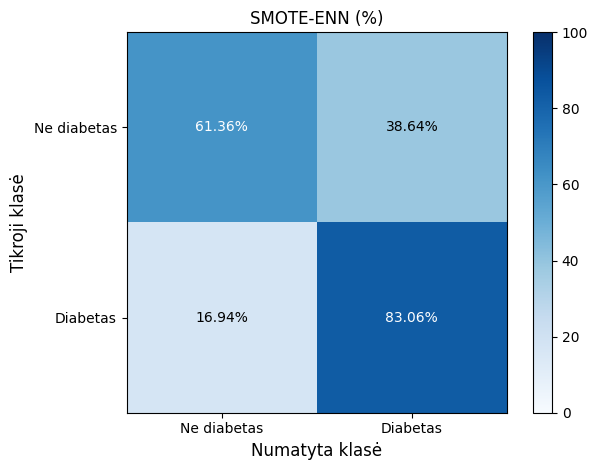

In [3]:
# Sumaišties matricos rezultatai, naudojant SMOTE-ENN
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
df = pd.read_csv('cdc_diabetes_data.csv', encoding='utf-8-sig')

df.drop(columns=['ID'], inplace=True)

X = df.drop(columns=['Diabeto indikatorius'])
y = df['Diabeto indikatorius']

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

pipeline = Pipeline([
    ('smote_enn', SMOTEENN(sampling_strategy=0.99, random_state=7)),
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=7))
])

f1_scores = []
confusion_matrices = []

for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    pipeline.fit(X_train, y_train)
    test_preds = pipeline.predict(X_test)

    f1_scores.append(f1_score(y_test, test_preds))
    cm = confusion_matrix(y_test, test_preds)
    confusion_matrices.append(cm)

print(f"Mean F1-score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")

mean_cm = np.mean(confusion_matrices, axis=0)
cm_percentage = mean_cm.astype('float') / mean_cm.sum(axis=1)[:, np.newaxis] * 100
fig, ax = plt.subplots()
cax = ax.matshow(cm_percentage, cmap=plt.cm.Blues, vmin=0, vmax=100)  
plt.title('SMOTE-ENN (%)', fontsize=12)
fig.colorbar(cax)

ax.set_xticks(np.arange(2))  
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Ne diabetas', 'Diabetas'], fontsize=10)
ax.set_yticklabels(['Ne diabetas', 'Diabetas'], fontsize=10)
ax.xaxis.set_ticks_position('bottom')

for (i, j), val in np.ndenumerate(cm_percentage):
    text_color = 'white' if val > 50 else 'black'
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center', color=text_color, fontsize=10)

plt.xlabel("Numatyta klasė", fontsize=12)
plt.ylabel("Tikroji klasė", fontsize=12)
plt.tight_layout()
#plt.savefig("diabetes_smote_enn_cross_confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()


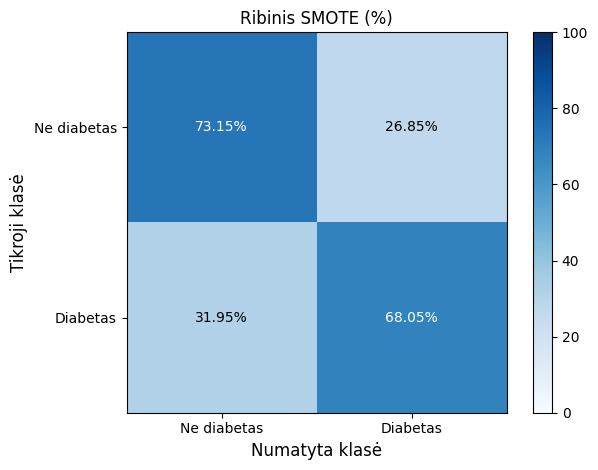

In [4]:
# Sumaišties matricos rezultatai, naudojant ribinį SMOTE
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

df = pd.read_csv('cdc_diabetes_data.csv', encoding='utf-8-sig')

df.drop(columns=['ID'], inplace=True)

X = df.drop(columns=['Diabeto indikatorius'])
y = df['Diabeto indikatorius']

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

pipeline = Pipeline([
    ('borderline_smote', BorderlineSMOTE(sampling_strategy=0.99, random_state=7)),
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=7))
])

f1_scores = []
confusion_matrices = []

for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    pipeline.fit(X_train, y_train)
    test_preds = pipeline.predict(X_test)

    f1_scores.append(f1_score(y_test, test_preds))
    cm = confusion_matrix(y_test, test_preds)
    confusion_matrices.append(cm)

mean_cm = np.mean(confusion_matrices, axis=0)
cm_percentage = mean_cm.astype('float') / mean_cm.sum(axis=1)[:, np.newaxis] * 100
fig, ax = plt.subplots()
cax = ax.matshow(cm_percentage, cmap=plt.cm.Blues, vmin=0, vmax=100)  
plt.title('Ribinis SMOTE (%)', fontsize=12)
fig.colorbar(cax)

ax.set_xticks(np.arange(2))  
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Ne diabetas', 'Diabetas'], fontsize=10)
ax.set_yticklabels(['Ne diabetas', 'Diabetas'], fontsize=10)
ax.xaxis.set_ticks_position('bottom')

for (i, j), val in np.ndenumerate(cm_percentage):
    text_color = 'white' if val > 50 else 'black'
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center', color=text_color, fontsize=10)

plt.xlabel("Numatyta klasė", fontsize=12)
plt.ylabel("Tikroji klasė", fontsize=12)
plt.tight_layout()
#plt.savefig("diabetes_borderline_smote_cross_confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

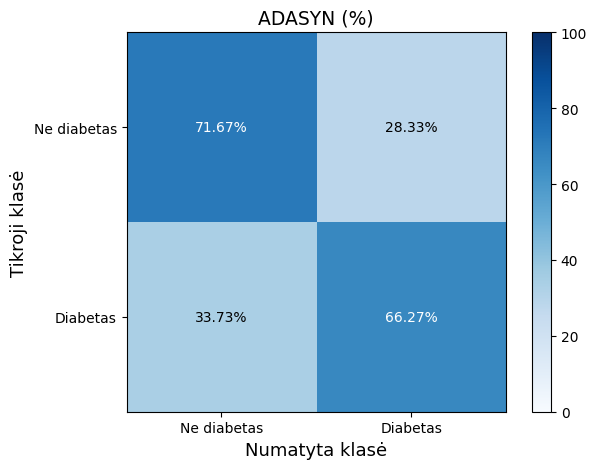

In [6]:
# Sumaišties matricos rezultatai, naudojant ADASYN
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import TomekLinks

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer


df = pd.read_csv('cdc_diabetes_data.csv', encoding='utf-8-sig')

df.drop(columns=['ID'], inplace=True)

X = df.drop(columns=['Diabeto indikatorius'])
y = df['Diabeto indikatorius']

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

pipeline = Pipeline([
    ('adasyn', ADASYN(sampling_strategy=0.99, random_state=7)),
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=7))
])

f1_scores = []
confusion_matrices = []

for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    pipeline.fit(X_train, y_train)
    test_preds = pipeline.predict(X_test)

    f1_scores.append(f1_score(y_test, test_preds))
    cm = confusion_matrix(y_test, test_preds)
    confusion_matrices.append(cm)

mean_cm = np.mean(confusion_matrices, axis=0)
cm_percentage = mean_cm.astype('float') / mean_cm.sum(axis=1)[:, np.newaxis] * 100


fig, ax = plt.subplots()
cax = ax.matshow(cm_percentage, cmap=plt.cm.Blues, vmin=0, vmax=100) 
plt.title('ADASYN (%)', fontsize=13.5)
fig.colorbar(cax)

ax.set_xticks(np.arange(2))  
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Ne diabetas', 'Diabetas'], fontsize=10)
ax.set_yticklabels(['Ne diabetas', 'Diabetas'], fontsize=10)
ax.xaxis.set_ticks_position('bottom')

for (i, j), val in np.ndenumerate(cm_percentage):
    text_color = 'white' if val > 50 else 'black'
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center', color=text_color, fontsize=10)

plt.xlabel("Numatyta klasė", fontsize=13)
plt.ylabel("Tikroji klasė", fontsize=13)
plt.tight_layout()
#plt.savefig("diabetes_smote_adasyn_cross_confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()



In [ ]:
# Sumaišties matricos rezultatai, naudojant ADASYN ir Tomek
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import TomekLinks

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_maåçtrix, classification_report, f1_score
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

df = pd.read_csv('cdc_diabetes_data.csv', encoding='utf-8-sig')

df.drop(columns=['ID'], inplace=True)

X = df.drop(columns=['Diabeto indikatorius'])
y = df['Diabeto indikatorius']

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

pipeline = Pipeline([
    ('adasyn', ADASYN(sampling_strategy=0.99, random_state=7)),
    ('tomek', TomekLinks()),
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=7))
])

f1_scores = []
confusion_matrices = []

for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    pipeline.fit(X_train, y_train)
    test_preds = pipeline.predict(X_test)

    f1_scores.append(f1_score(y_test, test_preds))
    cm = confusion_matrix(y_test, test_preds)
    confusion_matrices.append(cm)

print(f"Mean F1-score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")

mean_cm = np.mean(confusion_matrices, axis=0)
cm_percentage = mean_cm.astype('float') / mean_cm.sum(axis=1)[:, np.newaxis] * 100
fig, ax = plt.subplots()
cax = ax.matshow(cm_percentage, cmap=plt.cm.Blues, vmin=0, vmax=100)  
plt.title('ADASYN ir Tomek nuorodos (%)', fontsize=12)
fig.colorbar(cax)

ax.set_xticks(np.arange(2))  
ax.set_yticks(np.arange(2))
ax.set_xticklabels(['Ne diabetas', 'Diabetas'], fontsize=10)
ax.set_yticklabels(['Ne diabetas', 'Diabetas'], fontsize=10)
ax.xaxis.set_ticks_position('bottom')

for (i, j), val in np.ndenumerate(cm_percentage):
    text_color = 'white' if val > 50 else 'black'
    ax.text(j, i, f'{val:.2f}%', ha='center', va='center', color=text_color, fontsize=10)

plt.xlabel("Numatyta klasė", fontsize=12)
plt.ylabel("Tikroji klasė", fontsize=12)
plt.tight_layout()
#plt.savefig("diabetes_smote_adasyn_tomek_cross_confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()
